<a href="https://colab.research.google.com/github/aidancaputi/ece495cv/blob/main/fruit_ripeness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up dataset dir


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install dependencies

In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image
import os
from PIL import Image
import torchvision, cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.9/166.8 GB disk)


## Set up data
If you do this right, it should print out the contents of our shared folder in google drive

In [ ]:
#you need to go right click on the shared folder ('49595 project'), then organize, then add shortcut
#this will prompt you to put it somewhere in your drive
#once you've put it somewhere in your drive, then you can use it
#for some reason, it will only recognize the data.yaml file if its in your own drive, not the shared with me part

#path to where you added the shortcut to the shared folder (read above if this makes no sense to you)
###### CHANGE THIS TO YOUR PERSONAL LOCATION ######
shortcut_location = '/content/drive/MyDrive/ECE49595CV/49595-project'

#the folders we need from within that shared folder
dataset_folder = shortcut_location + '/dataset/bananas/'
pretrained_folder = shortcut_location + '/pretrained-models/'
trained_folder = dataset_folder +  '/trained-models/'

#print the stuff to see if you got it right
!ls {shortcut_location}

ls: cannot access '/content/drive/MyDrive/ECE49595CV/49595-project': No such file or directory


##Training


Training basically only needs 2 things:
*   First is the 'data.yaml' file. This basically just tells it where the images are and what the classes in the labels mean
*   Second is the pre-trained model





## Train the banana model

This only has to be run once, afterwards the models are saved and can be reused

In [ ]:
# sets up the pre trained model from the shared folder

# the pretrained model we are using
model_name = 'yolov8x'

# load the pretrained model
model = YOLO(pretrained_folder + model_name + '.pt')

# train on our dataset
results = model.train(data=dataset_folder + 'joshs-data.yaml',
                      epochs=20, # how long to train for
                      project=trained_folder,  # where to save the model after it's done training
                      name=model_name) # what to name the model

# validate to see final performance
results = model.val()

Ultralytics YOLOv8.0.211 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/ECE49595CV/49595-project/pretrained-models/yolov8x.pt, data=/content/drive/MyDrive/ECE49595CV/49595-project/dataset/bananas/joshs-data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/ECE49595CV/49595-project/dataset/bananas//trained-models/, name=yolov8x7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

FileNotFoundError: ignored

## Test the banana models

Load each model, test each model on the same test image, compare results


image 1/1 /content/drive/MyDrive/ECE49595CV/49595-project/dataset/bananas/different-ripeness-levels.jpg: 384x640 1 freshripe, 2 overripes, 4 ripes, 1 rotten, 51.6ms
Speed: 3.0ms preprocess, 51.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Object detection and classification results for model yolov8x10epoch.pt


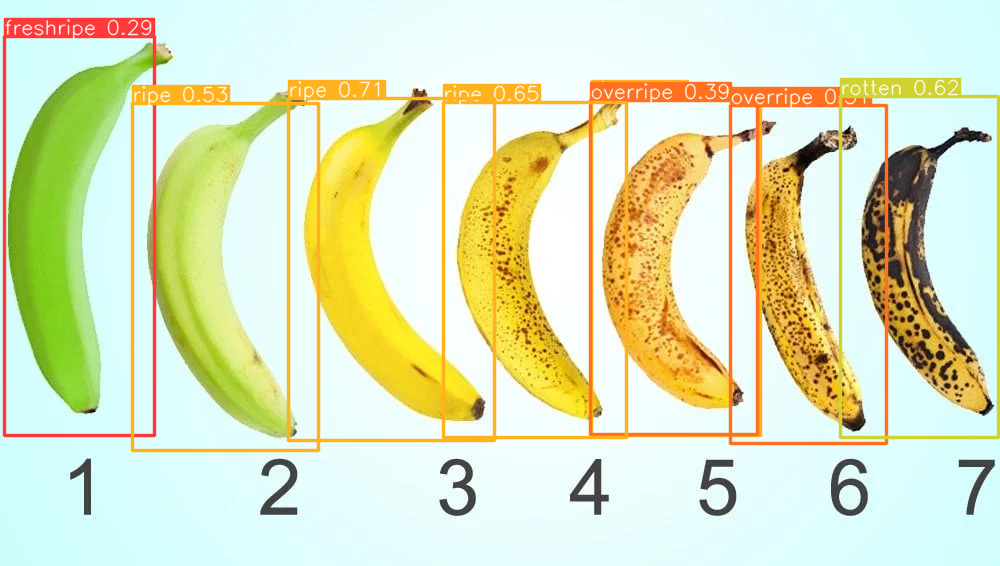


image 1/1 /content/drive/MyDrive/ECE49595CV/49595-project/dataset/bananas/different-ripeness-levels.jpg: 384x640 3 ripes, 2 rottens, 9.8ms
Speed: 2.3ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Object detection and classification results for model yolov8s10epoch.pt


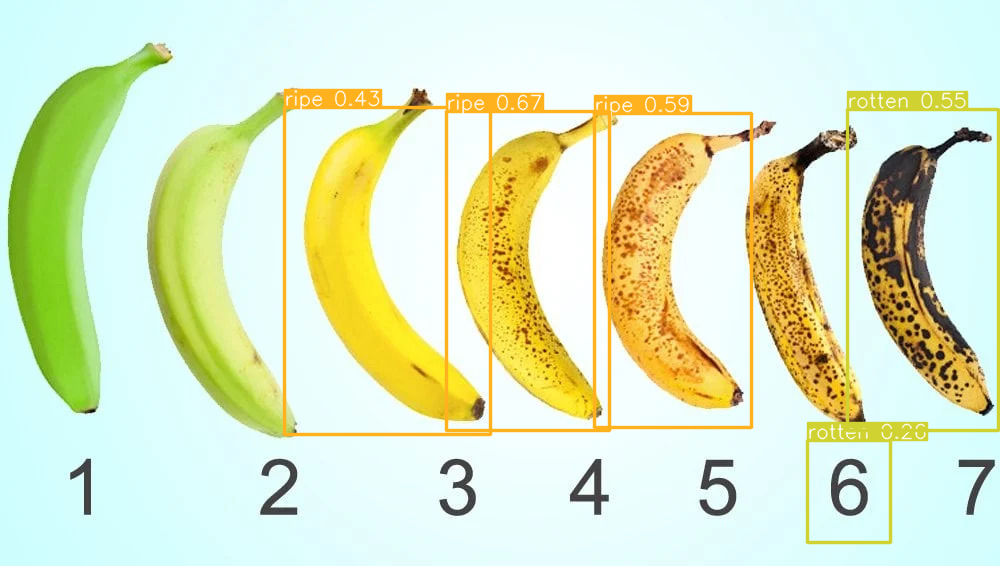


image 1/1 /content/drive/MyDrive/ECE49595CV/49595-project/dataset/bananas/different-ripeness-levels.jpg: 384x640 2 freshripes, 6 ripes, 1 rotten, 21.2ms
Speed: 2.1ms preprocess, 21.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Object detection and classification results for model yolov8m10epoch.pt


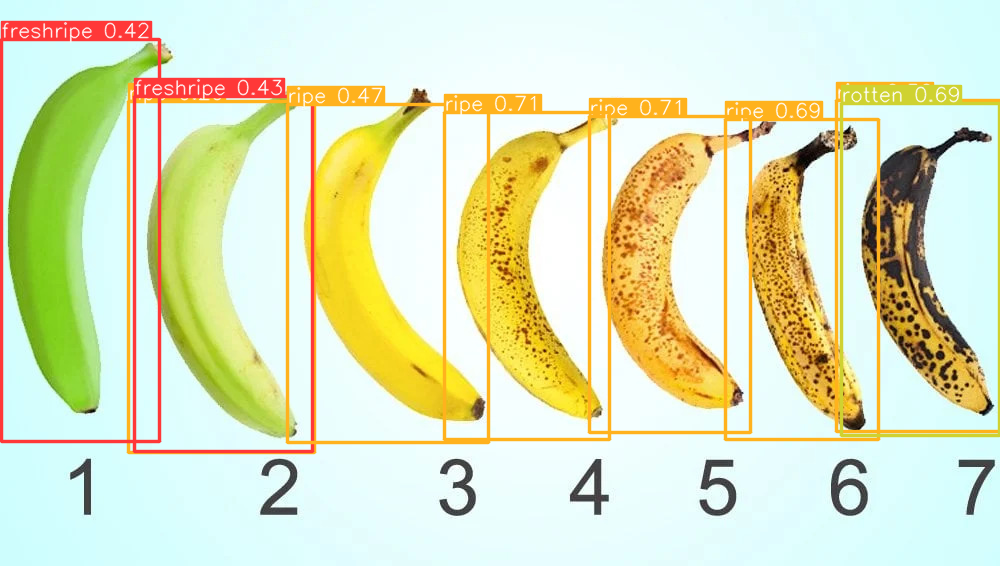


image 1/1 /content/drive/MyDrive/ECE49595CV/49595-project/dataset/bananas/different-ripeness-levels.jpg: 384x640 1 freshripe, 1 overripe, 5 ripes, 1 rotten, 42.0ms
Speed: 3.1ms preprocess, 42.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Object detection and classification results for model yolov8l10epoch.pt


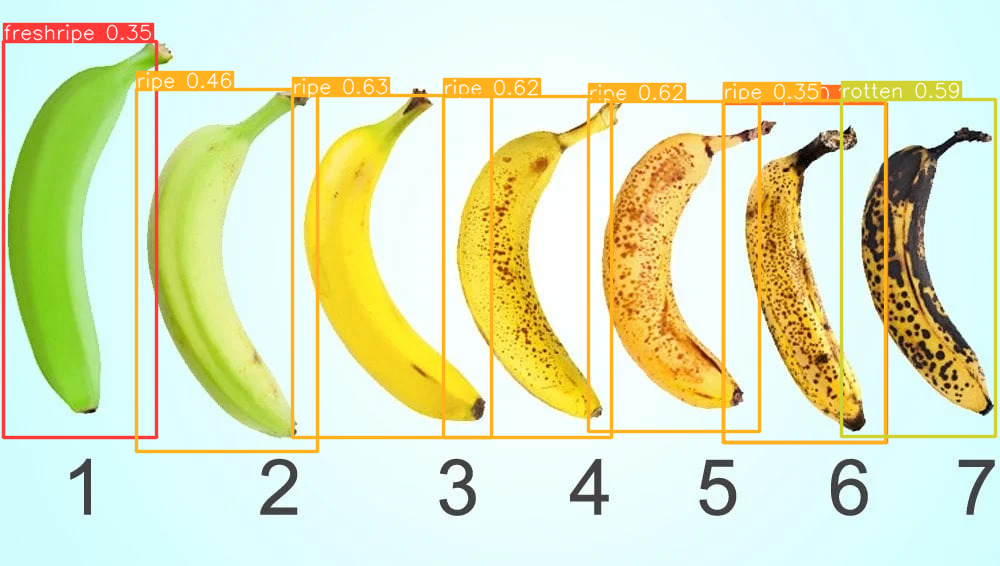

In [ ]:
# to run an inference on a test image:
# 1. load the model using YOLO("model_name.pt")
#      - the best model so far is yolov8x10epoch.pt in /trained-models/
# 2. run the model on the image using model_name(test_image)
# 3. display the predictions using PIL (copy and paste the results for loop)

# load an image to test the models on
test_image = dataset_folder + 'different-ripeness-levels.jpg'

for model in os.listdir(trained_folder):
    if model.endswith('.pt'):
        loaded_model = YOLO(trained_folder + model) # 1. load model
        results = loaded_model(test_image) # 2. run model on the image

        # 3. display the predictions using PIL
        for r in results:
            im_array = r.plot() # plot a BGR numpy array of predictions
            im = Image.fromarray(im_array[..., ::-1]) # RGB PIL image
            print("Object detection and classification results for model " + model) # print model name
            display(im) # show image


##Days until ripe test - Aidan C

In [ ]:


def make_pred_on_folder(model_path, image_folder_path):
  aidanc_best_model = YOLO(model_path)
  aidanc_dataset_folder = image_folder_path

  predictions_dict = {}

  #for image in test dataset folder
  for image in os.listdir(aidanc_dataset_folder):

    #create an entry in the dict with that image name
    predictions_dict.update({image:[]})

    #predict on the image
    results = aidanc_best_model(aidanc_dataset_folder + image)

    #for each prediction in the output
    for result in results:

      #add the class and boxes to the dict entry for that image
      predictions_dict.update({image:[
          result.boxes.cls,
          result.boxes.xyxy,
      ]})
  return predictions_dict

predictions_dict = make_pred_on_folder('/content/drive/MyDrive/College/Fall2023/ECE495CV/49595-project/dataset/bananas/trained-models/yolov8x10epoch.pt',
                                '/content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/timelapse/')


image 1/1 /content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/timelapse/day2-ripe-13.png: 640x640 3 freshunripes, 97.8ms
Speed: 14.3ms preprocess, 97.8ms inference, 40.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/timelapse/day3-ripe-12.png: 640x640 1 freshripe, 3 freshunripes, 81.8ms
Speed: 3.3ms preprocess, 81.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/timelapse/day4-ripe-11.png: 576x640 3 freshunripes, 94.4ms
Speed: 2.8ms preprocess, 94.4ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)

image 1/1 /content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/timelapse/day5-ripe-10.png: 608x640 3 freshunripes, 1 unripe, 97.8ms
Speed: 2.7ms preprocess, 97.8ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 /content/drive/M

# THis cell prepares the dataset using the predictions

In [ ]:
def create_dataset(pred_dict):
  X = []
  y = []

  #go through predictions dict
  for im in pred_dict:

    label_name = im.split('-')[2].split('.')[0] + '-until-' + im.split('-')[1]

    #for each box in the image, get class and coordinates
    for cls, box in zip(pred_dict[im][0], predictions_dict[im][1]):

      #load the original image
      loaded_image = Image.open('/content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/timelapse/' + im)

      #crop the bounding box
      cropped_image = loaded_image.crop((int(box[0]),int(box[1]),int(box[2]),int(box[3])))

      #get the color palette for that bounding box
      reduced = cropped_image.convert("P", palette=Image.WEB)
      palette = reduced.getpalette()
      palette = [palette[3*n:3*n+3] for n in range(256)]
      color_counts = [(n, palette[m]) for n,m in reduced.getcolors()]

      #go through color counts and remove white to filter background
      filtered_color_counts = [item for item in color_counts if (item[1][0] <= 230 and item[1][1] <= 230 and item[1][2] <= 230)]

      sorted_filtered_color_counts = sorted(filtered_color_counts, reverse=True)

      total_rgb = [0, 0, 0]
      for color in sorted_filtered_color_counts[0:5]:

        total_rgb = [(g + h) for g, h in zip(total_rgb, color[1])]

      X.append(np.array([x / 5.0 for x in total_rgb]))

      if 'rotten' in label_name:
        if 'neg' in label_name:
          y.append(-1 * int(label_name.split('-')[0].replace('neg', '')))
        else:
          y.append(int(label_name.split('-')[0]))
      else:
        y.append(int(label_name.split('-')[0]) + 11)
  return X, y

X, y = create_dataset(predictions_dict)

for lab, val in zip(X, y):
  print(lab, val)

[      150.6       219.4        18.4] 24
[        151       208.4         7.4] 24
[      151.8       217.4        16.2] 24
[      189.6       222.2          94] 23
[      158.2       217.6         7.4] 23
[      158.6       217.4           8] 23
[        158       217.8         7.4] 23
[      193.6         219          94] 22
[      162.4         215           7] 22
[        179         215        50.8] 22
[      201.2         219        93.4] 21
[      156.6       212.2          13] 21
[      201.2         219        93.4] 21
[      184.8       214.8        49.6] 21
[      207.6       222.2        94.8] 20
[        160       193.8          12] 20
[        160       193.8          12] 20
[      179.2       196.6        49.6] 20
[      208.8       222.4        93.6] 19
[      168.8         187         2.2] 19
[        162       193.2        11.4] 19
[      181.4         196        49.8] 19
[      218.2       219.4        95.8] 18
[      187.6       203.4         1.6] 18
[      175.8    

## Linear regression version:

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split



#train regression model
np_X = np.array(X)
np_y = np.array(y)

data = pd.DataFrame({'Label': np_y, 'R': np_X[:, 0], 'G': np_X[:, 1], 'B': np_X[:, 2]})

final_X = data[['R', 'G', 'B']]
final_y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(
    final_X, final_y, test_size=0.1, random_state=101)

linear_regression = LinearRegression()
linear_regression.fit(X_train.values, y_train)
print("linear regression model trained")

linear regression model trained


## NN version:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.model_selection import train_test_split

mlp = MLPClassifier()
mlp.fit(X_train.values, y_train)

print("mlp trained")

mlp trained


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Testing both on the new image:

In [52]:
def test_ripeness(images_path):
  pred_dict = make_pred_on_folder('/content/drive/MyDrive/College/Fall2023/ECE495CV/49595-project/dataset/bananas/trained-models/yolov8x10epoch.pt',
                                images_path)

  #go through predictions dict
  for im in pred_dict:

    #for each box in the image, get class and coordinates
    for cls, box in zip(pred_dict[im][0], pred_dict[im][1]):

      #load the original image
      loaded_image = Image.open(images_path + im)

      #crop the bounding box
      cropped_image = loaded_image.crop((int(box[0]),int(box[1]),int(box[2]),int(box[3])))

      #get the color palette for that bounding box
      reduced = cropped_image.convert("P", palette=Image.WEB)
      palette = reduced.getpalette()
      palette = [palette[3*n:3*n+3] for n in range(256)] # group 3 by 3 = [[r,g,b],[r,g,b],...]
      color_counts = [(n, palette[m]) for n,m in reduced.getcolors()]

      #go through color counts and remove white to filter background
      filtered_color_counts = [item for item in color_counts if (item[1][0] <= 230 and item[1][1] <= 230 and item[1][2] <= 230)]

      sorted_filtered_color_counts = sorted(filtered_color_counts, reverse=True)

      total_rgb = [0, 0, 0]
      for count, entry in enumerate(sorted_filtered_color_counts[:5]):
        print(count, entry[1])
        total_rgb = [(g + h) for g, h in zip(total_rgb, entry[1])]

      mean_rgb = [x / 5.0 for x in total_rgb]
      print("mean: ", mean_rgb, '\n')

      mlp_pred = mlp.predict(np.array(mean_rgb).reshape(1, -1))
      lin_pred = linear_regression.predict(np.array(mean_rgb).reshape(1, -1))

      if(mlp_pred - 11 > 0):
        print("mlp pred -------> Days until ripe", mlp_pred - 11)
      else:
        print("mlp pred -------> Days until rotten", mlp_pred)

      if(lin_pred - 11 > 0):
        print("linear regression pred -------> Days until ripe", lin_pred - 11)
      else:
        print("linear regression pred -------> Days until rotten", lin_pred)

      display(cropped_image)
      print('\n')

test_ripeness('/content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/separate-test-images/')

def pred_ripeness(path):

  #get the color palette for that bounding box
  image = Image.open(path)
  reduced = image.convert("P", palette=Image.WEB)
  palette = reduced.getpalette()
  palette = [palette[3*n:3*n+3] for n in range(256)] # group 3 by 3 = [[r,g,b],[r,g,b],...]
  color_counts = [(n, palette[m]) for n,m in reduced.getcolors()]

  #go through color counts and remove white to filter background
  filtered_color_counts = [item for item in color_counts if (item[1][0] <= 230 and item[1][1] <= 230 and item[1][2] <= 230)]

  sorted_filtered_color_counts = sorted(filtered_color_counts, reverse=True)

  total_rgb = [0, 0, 0]
  for count, entry in enumerate(sorted_filtered_color_counts[:5]):
    print(count, entry[1])
    total_rgb = [(g + h) for g, h in zip(total_rgb, entry[1])]

  mean_rgb = [x / 5.0 for x in total_rgb]
  print("mean: ", mean_rgb, '\n')

  mlp_pred = mlp.predict(np.array(mean_rgb).reshape(1, -1))
  lin_pred = linear_regression.predict(np.array(mean_rgb).reshape(1, -1))

  pred = ''

  if(mlp_pred - 11 > 0):
    print("mlp pred -------> Days until ripe", mlp_pred - 11)
  else:
    print("mlp pred -------> Days until rotten", mlp_pred)

  if(lin_pred - 11 > 0):
    print("linear regression pred -------> Days until ripe", lin_pred - 11)
    pred = str(lin_pred - 11) + ' days until ripe'
  else:
    print("linear regression pred -------> Days until rotten", lin_pred)
    pred = str(lin_pred) + ' days until rotten'

  return pred

OutOfMemoryError: ignored

Adding segmentation

In [ ]:
import os
import numpy as np
import cv2
import zipfile
import requests
import glob as glob

import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import warnings
import logging
import absl

#suppresses warnings
warnings.filterwarnings("ignore", module="absl")
logging.captureWarnings(True)
absl_logger = logging.getLogger("absl")
absl_logger.setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

model_url =  'https://tfhub.dev/google/HRNet/coco-hrnetv2-w48/1'
print('loading model: ', model_url)

seg_model = hub.load(model_url)
print('\nmodel loaded!')



loading model:  https://tfhub.dev/google/HRNet/coco-hrnetv2-w48/1

model loaded!


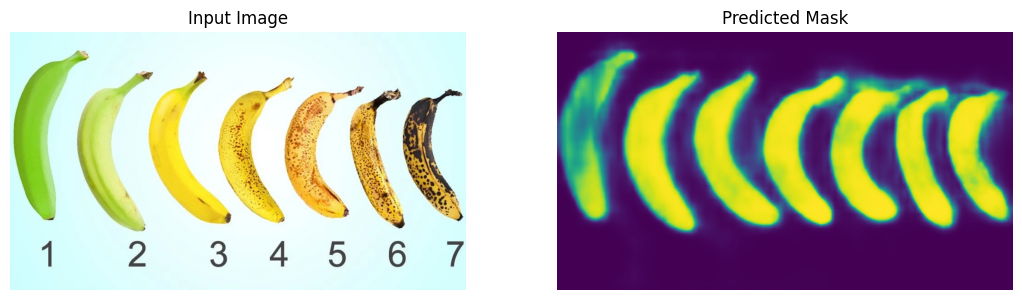

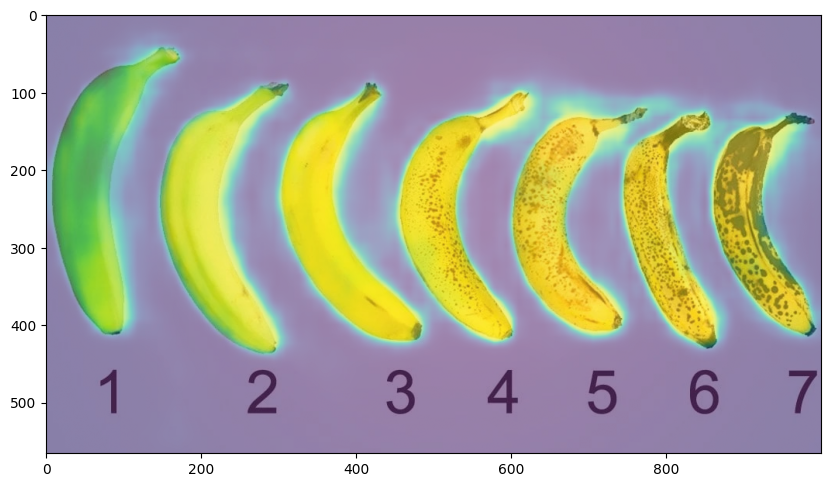

In [ ]:
from matplotlib import pyplot as plt
def load_image(path):

    image = cv2.imread(path)

    # Convert image in BGR format to RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Add a batch dimension which is required by the model.
    image = np.expand_dims(image, axis=0)/255.0

    return image

def segment_banana1(image):
  pred_mask = seg_model.predict(test_image)

  pred_mask = pred_mask.numpy()

  # The 1st label is the background class added by the model, but we can remove it for this dataset.
  pred_mask = pred_mask[:,:,:,1:]

  # We also need to remove the batch dimension.
  pred_mask = np.squeeze(pred_mask)

  plt.figure(figsize=(20,6))

  plt.subplot(1,3,1)
  plt.title('Input Image', fontsize=14)
  #plt.imshow(np.squeeze(test_image))

  plt.subplot(1,2,2)
  plt.title('Predictions for Class: banana', fontsize=14)
  #plt.imshow(pred_mask[:,:,52], cmap='gray');
  plt.axis('off')
  return pred_mask[:,:,52]

def image_overlay(image, seg_map_rgb):

    alpha = 1.0 # Transparency for the original image.
    beta  = 0.6 # Transparency for the segmentation map.
    gamma = 0.0 # Scalar added to each sum.

    image = (image*255.0).astype(np.uint8)
    #seg_map_rgb = cv2.cvtColor(seg_map_rgb, cv2.COLOR_RGB2BGR)

    image = cv2.addWeighted(image, alpha, seg_map_rgb, beta, gamma)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image

class_index = {
         0: [(0, 0, 255),  'Banana'],
    }

def run_inference(img, model):

      # Forward pass through the model (convert the tensor output to a numpy array).
      pred_mask = model.predict(img).numpy()

      # Remove the background class added by the model.
      pred_mask = pred_mask[:,:,:,1:]

      # Remove the batch dimension.
      pred_mask = np.squeeze(pred_mask)



      fig = plt.figure(figsize=(20, 15))

      # Display the original image.
      ax1 = fig.add_subplot(1,3,1)
      ax1.imshow(img[0])
      ax1.title.set_text('Input Image')
      plt.axis('off')

      # Display the predicted color segmentation mask.
      ax2 = fig.add_subplot(1,3,2)
      ax2.set_title('Predicted Mask')
      ax2.imshow(pred_mask[:,:,52])
      plt.axis('off')

      # Display the predicted color segmentation mask overlayed on the original image.
      #plt.show()

      return pred_mask[:,:,52]

def segent_banana(image):

  # Forward pass through the model (convert the tensor output to a numpy array).
  pred_mask = seg_model.predict(image).numpy()

  # Remove the background class added by the model.
  pred_mask = pred_mask[:,:,:,1:]

  # Remove the batch dimension.
  pred_mask = np.squeeze(pred_mask)

  return pred_mask[:,:,52]

test_image = load_image('/content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/separate-test-images/test1.jpg')

pred_mask = run_inference(test_image, seg_model)

plt.figure(figsize = (10,10))
plt.imshow(test_image[0])
plt.imshow(pred_mask, alpha=0.5)

In [ ]:
#now we turn this into a function that takes a banana crop and does this then predicts days

import cv2
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image, ImageFont, ImageDraw


def pred_ripeness(image):

  #get the color palette
  reduced = image.convert("P", palette=Image.WEB)
  palette = reduced.getpalette()
  palette = [palette[3*n:3*n+3] for n in range(256)] # group 3 by 3 = [[r,g,b],[r,g,b],...]
  color_counts = [(n, palette[m]) for n,m in reduced.getcolors()]

  #go through color counts and remove white to filter background and black to filter cropped area
  filtered_color_counts = [item for item in color_counts if (item[1][0] <= 230 and item[1][1] <= 230 and item[1][2] <= 230)]
  filtered_color_counts = [item for item in color_counts if (item[1][0] != 0 and item[1][1] != 0 and item[1][2] != 255)]

  sorted_filtered_color_counts = sorted(filtered_color_counts, reverse=True)

  total_rgb = [0, 0, 0]
  for count, entry in enumerate(sorted_filtered_color_counts[:5]):
    print(count, entry[1])
    total_rgb = [(g + h) for g, h in zip(total_rgb, entry[1])]

  mean_rgb = [x / 5.0 for x in total_rgb]
  print("mean: ", mean_rgb, '\n')

  lin_pred = linear_regression.predict(np.array(mean_rgb).reshape(1, -1))

  if(lin_pred - 11 > 0):
    print("linear regression pred -------> Days until ripe", lin_pred - 11)
  else:
    print("linear regression pred -------> Days until rotten", lin_pred)

  return

def segment_and_predict(path):

  #load the image
  image = load_image(path)

  #create segmentation mask
  pred_mask = segent_banana(image)

  pred_mask = pred_mask > 0.025

  pred_mask = np.expand_dims(pred_mask, axis=-1)

  pred_mask =  np.concatenate((pred_mask, pred_mask, pred_mask), axis=-1)

  img_org = cv2.imread(path)
  img_org = cv2.cvtColor(img_org,cv2.COLOR_BGR2RGB)

  cropped = img_org * pred_mask

  pred_ripeness(Image.fromarray(cropped))

  plt.imshow(cropped)
  plt.show()

  return

def pil_to_cv2(pil_image):

  open_cv_image = np.array(pil_image)

  return open_cv_image[:, :, ::-1].copy()

def segment_and_predict_in_gui(input_image):

  orig_image = pil_to_cv2(input_image)

  image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)

  image = np.expand_dims(image, axis=0)/255.0

  pred_mask = segent_banana(image)

  pred_mask = pred_mask > 0.55

  pred_mask = np.expand_dims(pred_mask, axis=-1)

  pred_mask =  np.concatenate((pred_mask, pred_mask, pred_mask), axis=-1)

  img_org = cv2.cvtColor(orig_image,cv2.COLOR_BGR2RGB)

  cropped = img_org * pred_mask

  pred_ripeness(Image.fromarray(cropped))

  plt.imshow(cropped)
  plt.show()

  return


model = YOLO('/content/drive/MyDrive/College/Fall2023/ECE495CV/49595-project/dataset/bananas/trained-models/yolov8x10epoch.pt') # 1. load model
results2 = model('/content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/separate-test-images/test1.jpg') # 2. run model on the image



OutOfMemoryError: ignored

Object detection and classification results for model 
0 [255, 204, 51]
1 [255, 255, 51]
2 [255, 204, 0]
3 [204, 204, 51]
4 [255, 255, 0]
mean:  [244.8, 224.4, 30.6] 

linear regression pred -------> Days until ripe [     5.5644]


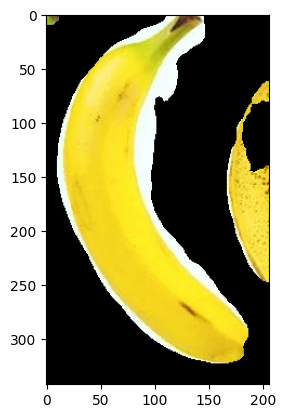

0 [255, 204, 51]
1 [204, 204, 51]
2 [255, 255, 51]
3 [204, 153, 51]
4 [255, 255, 204]
mean:  [234.6, 214.2, 81.6] 

linear regression pred -------> Days until ripe [     4.1126]


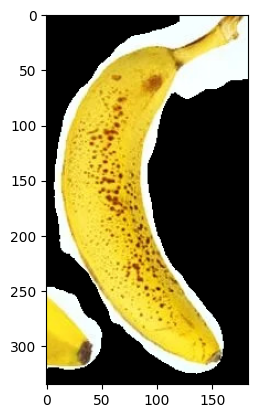

0 [51, 51, 51]
1 [204, 153, 51]
2 [153, 102, 51]
3 [102, 51, 51]
4 [51, 51, 0]
mean:  [112.2, 81.6, 40.8] 

linear regression pred -------> Days until rotten [    -3.1778]


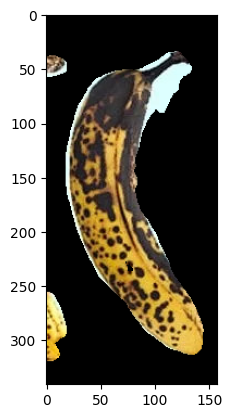

0 [204, 204, 102]
1 [204, 255, 102]
2 [153, 204, 51]
3 [204, 255, 153]
4 [204, 204, 51]
mean:  [193.8, 224.4, 91.8] 

linear regression pred -------> Days until ripe [      11.04]


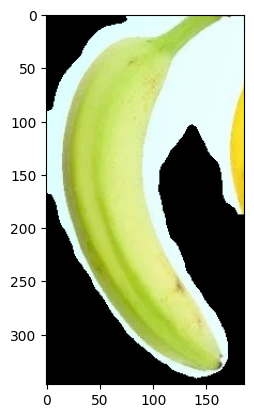

0 [204, 153, 51]
1 [255, 204, 102]
2 [255, 204, 51]
3 [153, 102, 0]
4 [153, 102, 51]
mean:  [204.0, 153.0, 51.0] 

linear regression pred -------> Days until rotten [     3.8442]


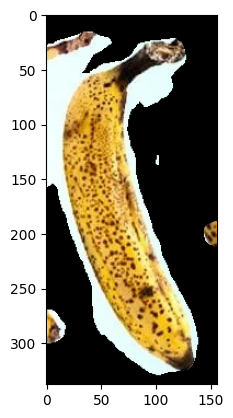

0 [255, 204, 102]
1 [204, 153, 51]
2 [255, 204, 51]
3 [255, 153, 51]
4 [255, 204, 153]
mean:  [244.8, 183.6, 81.6] 

linear regression pred -------> Days until rotten [     6.6293]


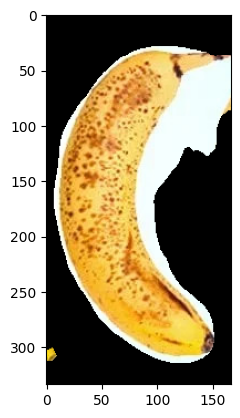

0 [255, 204, 102]
1 [204, 153, 51]
2 [255, 204, 51]
3 [255, 153, 51]
4 [255, 204, 153]
mean:  [244.8, 183.6, 81.6] 

linear regression pred -------> Days until rotten [     6.6293]


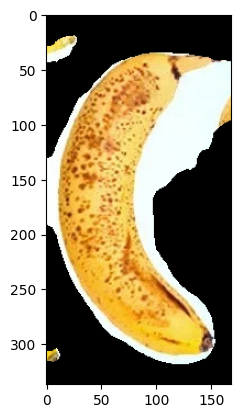

0 [153, 204, 51]
1 [102, 204, 51]
2 [153, 204, 102]
3 [102, 153, 51]
4 [102, 204, 0]
mean:  [122.4, 193.8, 51.0] 

linear regression pred -------> Days until ripe [     11.654]


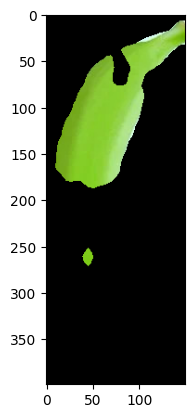

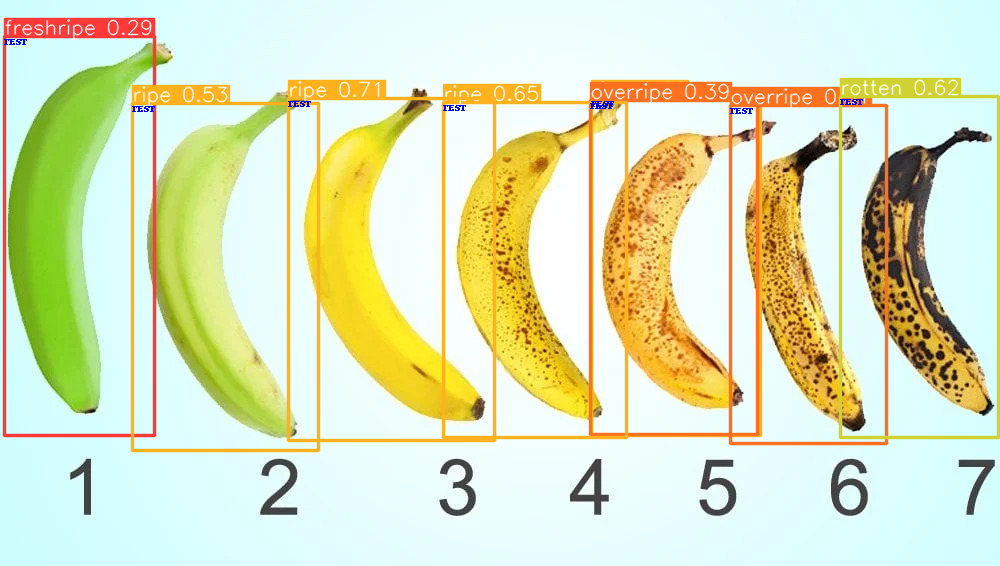

In [51]:
for r in results2:
  im_array = r.plot() # plot a BGR numpy array of predictions
  im = Image.fromarray(im_array[..., ::-1]) # RGB PIL image
  print("Object detection and classification results for model ") # print model name
  orig_image = Image.fromarray(r.orig_img[..., ::-1])

  draw = ImageDraw.Draw(im)

  #for each box in the image, get class and coordinates
  for cls, box in zip(r.boxes.cls, r.boxes.xyxy):

    #crop the bounding box
    cropped_image = orig_image.crop((int(box[0]),int(box[1]),int(box[2]),int(box[3])))

    segment_and_predict_in_gui(cropped_image)

    # draw.text((x, y),"Sample Text",(r,g,b))

    text = 'TEST'

    draw.text((int(box[0]), int(box[1])),text,(0,0,255))

  display(im) # show image

# Aidan A GUI


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
try:
  #take photo
  test_image = take_photo()

  modelName = 'yolov8x10epoch.pt'

  model = YOLO(trained_folder + modelName) # 1. load model
  results = model(test_image) # 2. run model on the image

  for r in results:
      im_array = r.plot() # plot a BGR numpy array of predictions
      im = Image.fromarray(im_array[..., ::-1]) # RGB PIL image
      print("Object detection and classification results for model " + modelName) # print model name

      segment_and_predict_in_gui(im)

      display(im) # show image

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotAllowedError: Permission denied


Chambo

In [ ]:
#This is essentially copied from josh with 2 avocado datasets (ripe and unripe)
#Required Folders
shortcut_location = 'your_custom_path'
!cp -r source destination

tomato_folder = shortcut_location + '/dataset/avocado/'
trained_avocado_folder = avocado_folder +  '/trained_models/'

# the pretrained model we are using
model_name = 'yolov8x'

# load the pretrained model
model = YOLO(pretrained_folder + model_name + '.pt')

# train on our dataset
results = model.train(data=tomato_folder + 'avocado-data.yaml',
                      epochs=25, # how long to train for
                      project=trained_avocado_folder,  # where to save the model after it's done training
                      name=model_name) # what to name the model


# load an image to test the models on
test_image = avocado_folder + 'test_avo.jpg'

for model in os.listdir(trained_avocado_folder):
    if model.endswith('.pt'):
        loaded_model = YOLO(trained_avocado_folder + model) # 1. load model
        results = loaded_model(test_image) # 2. run model on the image

        # 3. display the predictions using PIL
        for r in results:
            im_array = r.plot() # plot a BGR numpy array of predictions
            im = Image.fromarray(im_array[..., ::-1]) # RGB PIL image
            print("Object detection and classification results for model " + model) # print model name
            display(im) # show image